In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

In [32]:
file_path = 'Market_Basket_Optimisation.csv'

dataset = pd.read_csv(file_path)

# dataset = dataset.drop_duplicates()
# dataset = dataset.dropna()

In [3]:
# Dataset
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

In [33]:
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Flatten the dataset
flattened_dataset = [item for sublist in dataset for item in sublist]

In [35]:
# Count the frequency of each item
item_counts = Counter(flattened_dataset)

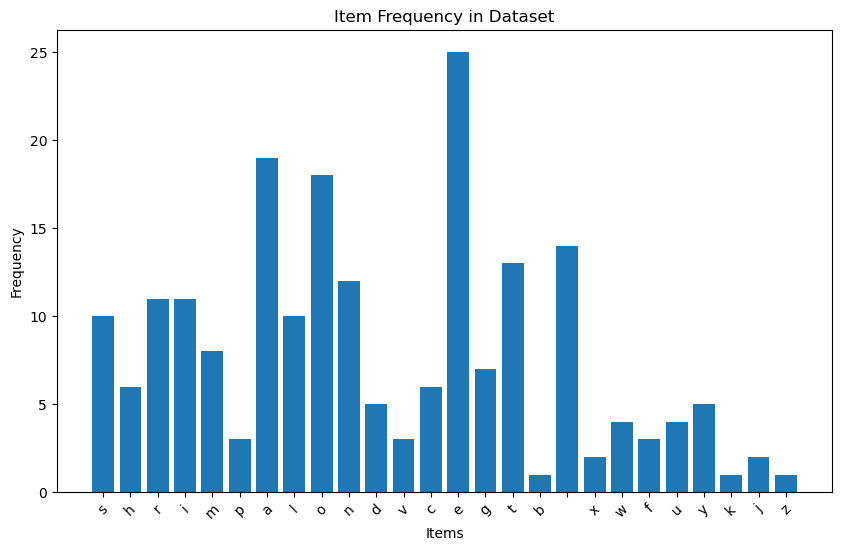

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(item_counts.keys(), item_counts.values())
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequency in Dataset')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Convert the dataset into a one-hot encoded dataframe
oht = pd.DataFrame(pd.Series(dataset).str.join('|').str.get_dummies('|'))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [38]:
transaction_series = pd.Series(dataset)

# Join the items within each transaction into a single string, using '|'
# Then, apply one-hot encoding to create dummy variables
oht = transaction_series.str.join('|').str.get_dummies('|')

# Now, oht is a one-hot encoded DataFrame where each row represents a transaction
# and each column represents an item, with binary values indicating item presence

# Let's print the first few rows to verify the conversion
print(oht.head())

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
oht

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,0,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,1
2,1,0,0,1,0,1,1,1,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,0,0


In [11]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(oht, min_support=0.4, use_colnames=True)

C:\Users\khali\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Dress, Heels)"
9,0.4,"(Dress, Scarf)"


In [13]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [14]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
1,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
2,(Dress),(Scarf),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
3,(Scarf),(Dress),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000
4,(Scarf),(Earrings),0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000
...,...,...,...,...,...,...,...,...,...,...
61,"(Skirt, Sneakers)","(Hat, Pants)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
62,(Hat),"(Pants, Skirt, Sneakers)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
63,(Pants),"(Hat, Skirt, Sneakers)",0.8,0.4,0.4,0.500000,1.250000,0.08,1.2,1.000000
64,(Skirt),"(Hat, Pants, Sneakers)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
